In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data, with all columns with string data type, for now
data = pd.read_csv('data1.csv')
# change data type to time stamp in 'event_timestamp'
data['event_timestamp'] = data['event_timestamp'].astype('datetime64[s]')
data.head()

,event_id,event_timestamp,page_title,organization_id,user_id,month,week,day,day_of_week
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02 11:47:43,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02 11:48:07,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02 11:48:16,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05 16:30:59,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,5,Sunday
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05 16:31:04,All job positions,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,5,Sunday


In [3]:
def cohort_retention(df, agent):
    # create a column of the first appearance of the agent
    g = data.groupby(agent)['month']   # grouping by month
    data['first_month_'+agent] = g.transform('min') # select the minimum of the group and create a column 
    
    # group by first_month and month 
    groups = data.groupby(['first_month_'+agent, 'month'])[agent].nunique().reset_index()
    groups = groups.pivot(index='first_month_'+agent, columns='month', values=agent)
    groups.columns.name = ''
    
    # calculate group size
    groups_size = data.groupby('first_month_'+agent)[agent].nunique()
    # add it to the dataset
    groups['groups_size'] = groups_size
    
    # divide the month columns by the group size
    retention = groups[groups.columns[:-1]].div(groups.groups_size, axis=0)
    retention.columns = ['Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    
    
    return groups, retention

In [4]:
groups_orgs, retention_orgs = cohort_retention(data, 'organization_id')

In [5]:
groups_orgs

,1,2,3,4,5,6,7,8,9,10,11,12,groups_size
first_month_organization_id,,,,,,,,,,,,,
1,7.0,7.0,7.0,7.0,7.0,7.0,6.0,5.0,5.0,6.0,6.0,6.0,7
2,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
3,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4
5,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2
6,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,2.0,3
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4


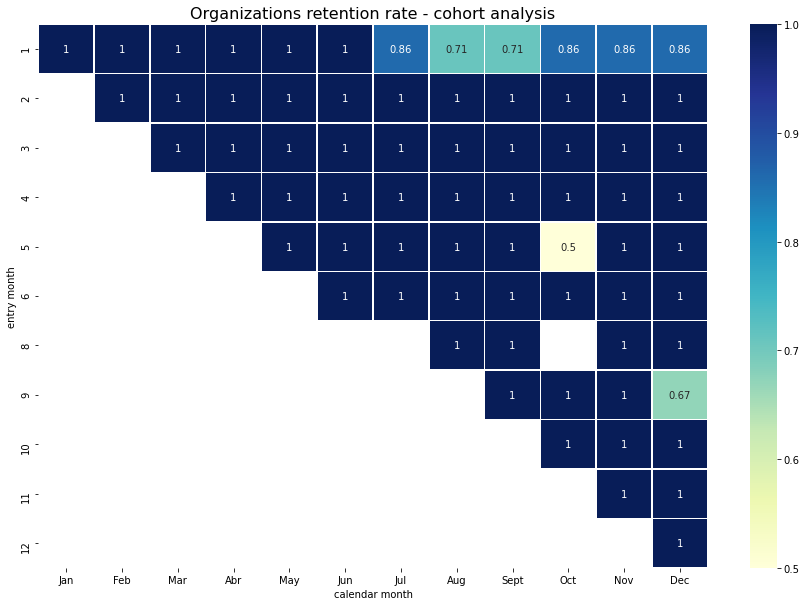

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(round(retention_orgs, 2), annot=True, linewidths=.5,  cmap="YlGnBu")
plt.title('Organizations retention rate - cohort analysis', fontsize = 16)
plt.ylabel('entry month')
plt.xlabel('calendar month')
plt.savefig('figures/4/1_orgs_retention', bbox_inches='tight')
plt.show()
plt.show()

In [7]:
groups_users, retention_users = cohort_retention(data, 'user_id')

In [8]:
groups_users

,1,2,3,4,5,6,7,8,9,10,11,12,groups_size
first_month_user_id,,,,,,,,,,,,,
1,80.0,48.0,29.0,21.0,22.0,19.0,12.0,12.0,14.0,14.0,16.0,13.0,80
2,NaN,36.0,8.0,6.0,7.0,7.0,5.0,5.0,7.0,5.0,5.0,4.0,36
3,NaN,NaN,112.0,21.0,16.0,8.0,7.0,5.0,11.0,10.0,5.0,7.0,112
4,NaN,NaN,NaN,91.0,34.0,26.0,17.0,20.0,21.0,26.0,21.0,22.0,91
5,NaN,NaN,NaN,NaN,82.0,27.0,5.0,9.0,9.0,4.0,11.0,8.0,82
6,NaN,NaN,NaN,NaN,NaN,45.0,17.0,18.0,10.0,13.0,11.0,13.0,45
7,NaN,NaN,NaN,NaN,NaN,NaN,17.0,4.0,2.0,1.0,2.0,2.0,17
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,35.0,12.0,10.0,7.0,46
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,20.0,16.0,9.0,57


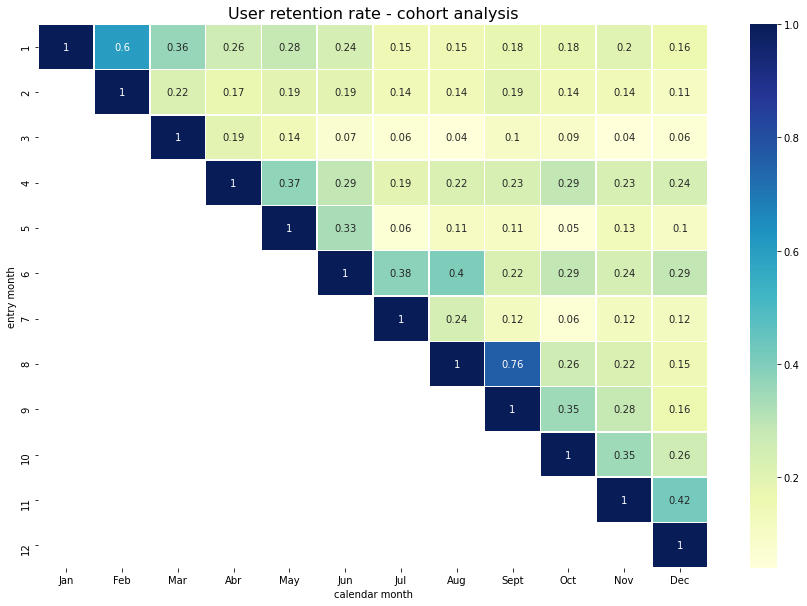

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(round(retention_users, 2), annot=True, linewidths=.5,  cmap="YlGnBu")
plt.title('User retention rate - cohort analysis', fontsize = 16)
plt.ylabel('entry month')
plt.xlabel('calendar month')
plt.savefig('figures/4/2_user_retention', bbox_inches='tight')
plt.show()